In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import sqlite3

# Setze die maximale Anzahl der anzuzeigenden Zeilen
pd.set_option('display.max_rows', 100)  # Beispiel: Zeige bis zu 100 Zeilen

# Setze die maximale Anzahl der anzuzeigenden Spalten
pd.set_option('display.max_columns', 50)  # Beispiel: Zeige bis zu 50 Spalten

# Für eine breitere Darstellung jeder Zeile (um das Abschneiden von Daten zu vermeiden)
pd.set_option('display.max_colwidth', None)  # Oder verwenden Sie eine spezifische Zahl



# 🚀 The average number of trips per month is 243,107.33, approximately 8,000 orders per day.

# 🚀 Most orders, around 6 months, occur during the evening and afternoon.
# 🚀 The most frequent day of the week among the six months is: Friday
# 🚀 The maximum duration for a trip is up to 16 minutes on average, which might vary more or less during rush hours.
# 🚀 The longest distances traveled along with their respective duration per mile are:
770.817337 miles with an average of 13.200000 minutes per mile
554.054184 miles with an average of 10.183333 minutes per mile
359.512786 miles with an average of 5.050000 minutes per mile
# 🚀 These durations seem unusual and suggest a technical issue either with the car or the system. These records need a review.
############################################
# 🚀 Die durchschnittliche Anzahl von Fahrten pro Monat beträgt 243.107,33, etwa 8.000 Bestellungen pro Tag.
# 🚀 Die meisten Bestellungen, ungefähr 6 Monate, erfolgen am Abend und am Nachmittag.
# 🚀  Die maximale Dauer einer Fahrt beträgt im Durchschnitt bis zu 16 Minuten, was während der Stoßzeiten variieren kann.
# 🚀 Die weitesten Strecken, zusammen mit ihrer jeweiligen Dauer pro Meile, sind:
770,817337 Meilen mit einem Durchschnitt von 13,2 Minuten pro Meile
554,054184 Meilen mit einem Durchschnitt von 10,183333 Minuten pro Meile
359,512786 Meilen mit einem Durchschnitt von 5,050000 Minuten pro Meile
# 🚀  Diese Dauerangaben erscheinen ungewöhnlich und deuten auf ein technisches Problem entweder mit dem Auto oder dem System hin. Diese Datensätze müssen überprüft werden.






In [136]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('NYCTaxis.db') 

query = "SELECT * FROM NYCTaxis"  
df_NYCTaxis = pd.read_sql_query(query, conn)
conn.close()


In [137]:
df_NYCTaxis.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [138]:
df_NYCTaxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [139]:
df_NYCTaxis.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [140]:
df_NYCTaxis.duplicated().sum()

0

#  Data 🗂️
 id: Object data type (likely a unique identifier or code for each record)

vendor_id: Integer data type

pickup_datetime: Object data type (datetime format, but currently stored as a string)

dropoff_datetime: Object data type (datetime format, stored as a string)

passenger_count: Integer data type

pickup_longitude: Float data type

pickup_latitude: Float data type

dropoff_longitude: Float data type

dropoff_latitude: Float data type

store_and_fwd_flag: Object data type (possibly a categorical variable stored as a string)

trip_duration: Data type not explicitly mentioned (likely integer or float)

id: An identifier or unique reference number for each record or instance in the dataset.

vendor_id: An identifier representing the taxi service provider or company.

pickup_datetime: The date and time when the taxi trip started.

dropoff_datetime: The date and time when the taxi trip ended.

passenger_count: The number of passengers in the taxi during the trip.

pickup_longitude: The longitude coordinate of the pickup location.

pickup_latitude: The latitude coordinate of the pickup location.

dropoff_longitude: The longitude coordinate of the dropoff location.

dropoff_latitude: The latitude coordinate of the dropoff location.

store_and_fwd_flag: A flag indicating whether the trip record was held in vehicle memory before sending it to the vendor.

trip_duration: The duration of the taxi trip in seconds or another unit of time.

# id:
 Object data type (likely a unique identifier or code for each record)

vendor_id: Integer data type

# pickup_datetime: Object data type (datetime format, but currently stored as a string)
# dropoff_datetime: Object data type (datetime format, stored as a string)
passenger_count: Integer data type
pickup_longitude: Float data type
pickup_latitude: Float data type
dropoff_longitude: Float data type
dropoff_latitude: Float data type

store_and_fwd_flag: Object data type (possibly a categorical variable stored as a string)
# trip_duration: 
Data type not explicitly mentioned (likely integer or float)
Given the data types and the nature of the columns, here are some potential considerations or actions you might take:

# Data type conversions:
 Convert columns containing date/time information (like pickup_datetime and dropoff_datetime) from strings to datetime objects for easier manipulation and analysis. In Python using Pandas, you can use pd.to_datetime() for this purpose.

# Handling categorical variables: 
If 'store_and_fwd_flag' is a categorical variable, consider encoding it properly for analysis. Techniques like one-hot encoding can be applied if necessary.

# Exploratory Data Analysis (EDA): 
Conduct exploratory analysis to understand the distribution of variables, identify outliers, and gain insights into the relationships between variables.

# Feature Engineering:
 Extracting additional features from the datetime columns, such as hour of the day, day of the week, or month, might be helpful for analysis or modeling.

# Statistical Analysis or Modeling:
 Depending on your objectives, you can perform statistical analyses or build predictive models using the available data. For instance, predicting trip duration based on various factors like pickup/dropoff locations, time, and passenger count.

In [141]:
#Pickup Date time
tuple_temp=[]

def pickup_time(pickup_time):
    
     pickup_time=int(pickup_time[11:13])
        
     if(pickup_time<6):
        tuple_temp.append("late_night")
        return ('late_night')
     elif( pickup_time>=6 and pickup_time<10):
        tuple_temp.append("rush_hour_morning")
        return ('rush_hour_morning')
     elif( pickup_time>=10 and pickup_time<15):
        tuple_temp.append("afternoon")
        return ('afternoon')
     elif( pickup_time>=15 and pickup_time<21):
        tuple_temp.append("rush_hour_evening")
        return ('rush_hour_evening')
     elif( pickup_time>=21 and pickup_time<23):
        tuple_temp.append("evening")    
        return ('evening')
     elif( pickup_time>=23):
        tuple_temp.append("late_night")
        return('late_night')
    
    


In [142]:
df_NYCTaxis['time_of_day'] = df_NYCTaxis.apply(lambda x: pickup_time(x['pickup_datetime']), axis=1)
df_NYCTaxis["time_of_day"] = tuple_temp
df_NYCTaxis.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,rush_hour_evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,late_night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,afternoon
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,rush_hour_evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,afternoon


In [162]:
time_difference = df_NYCTaxis['dropoff_datetime'].iloc[0] - df_NYCTaxis['pickup_datetime'].iloc[0]
time_difference_minutes = time_difference.total_seconds() / 60
print(time_difference_minutes)
time_difference


7.583333333333333


Timedelta('0 days 00:07:35')

Hinweis: es gibt Bibliotheken für die Arbeit mit geografischen Daten bspw.: 
geopy -> pip install geopy 
Hinweis: Du kannst die Distanzen berechnen, indem du "pickup_latitude" & "pickup_longitude" sowie "dropoff_latitude" & "dropoff_longitude" verwendest

nachdem du geopy installiert hast: 
 
from geopy.distance import geodesic

In [222]:

from geopy.distance import geodesic
# Calculate distance for each row in the DataFrame
distances = []
# The .iterrows() method in Pandas is used to iterate over the rows of a DataFrame. It returns an iterator yielding pairs of index and 
# row data as a Pandas Series.
for index, row in df_NYCTaxis.iterrows():
    pickup_coords = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff_coords = (row['dropoff_latitude'], row['dropoff_longitude'])
    
    distance = geodesic(pickup_coords, dropoff_coords).miles
    distances.append(distance)
# Add distances to a new column in the DataFrame
df_NYCTaxis['distance_miles'] = distances



# 🚀 The average number of trips per month is 243,107.33, approximately 8,000 orders per day.

# 🚀 Most orders, around 6 months, occur during the evening and afternoon.





/var/folders/bl/w0h35lbx7mg6mytwcqplynj80000gn/T/ipykernel_6715/2351194861.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_per_month_sorted.index, y=orders_per_month_sorted.values, palette='viridis')


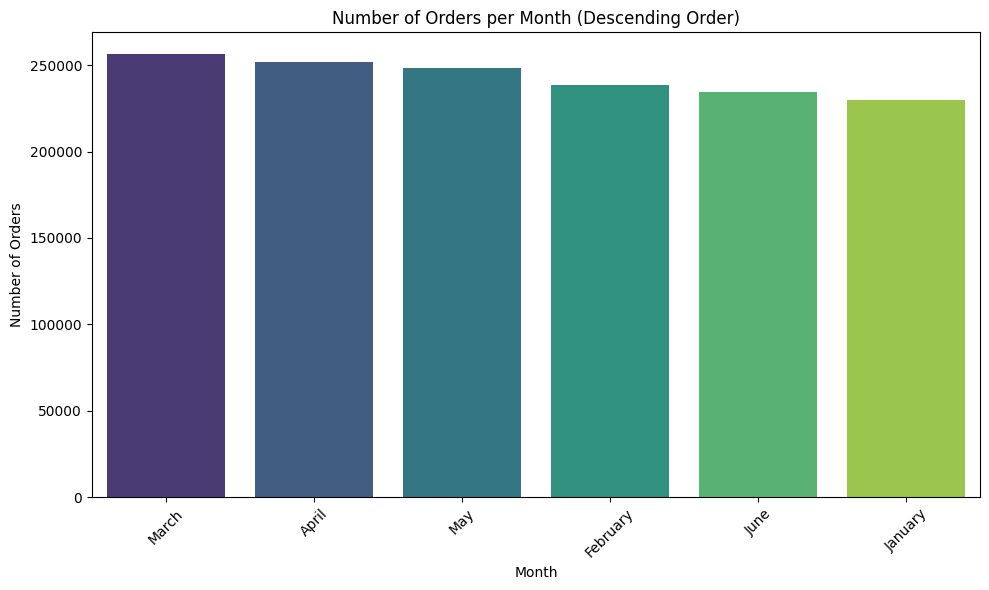

In [212]:


# Convert 'pickup_datetime' column to datetime if it's not already in that format
df_NYCTaxis['pickup_datetime'] = pd.to_datetime(df_NYCTaxis['pickup_datetime'])

# Extract month names from 'pickup_datetime' column and count the number of orders per month
orders_per_month = df_NYCTaxis['pickup_datetime'].dt.month_name().value_counts().sort_index()
orders_per_month_sorted = orders_per_month.sort_values(ascending=False)

# Plotting the colored bar chart with the sorted order
plt.figure(figsize=(10, 6))
sns.barplot(x=orders_per_month_sorted.index, y=orders_per_month_sorted.values, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Month (Descending Order)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()       # the average odres per month


In [224]:
orders_per_month_sorted.mean().__round__(2)

243107.33

In [233]:
orders_per_month_day =orders_per_month_sorted/30
orders_per_month_day

pickup_datetime
March       8539.633333
April       8388.166667
May         8282.900000
February    7943.333333
June        7810.533333
January     7656.900000
Name: count, dtype: float64

/var/folders/bl/w0h35lbx7mg6mytwcqplynj80000gn/T/ipykernel_6715/1519982996.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_per_month_day.index, y=orders_per_month_day.values, palette='viridis')


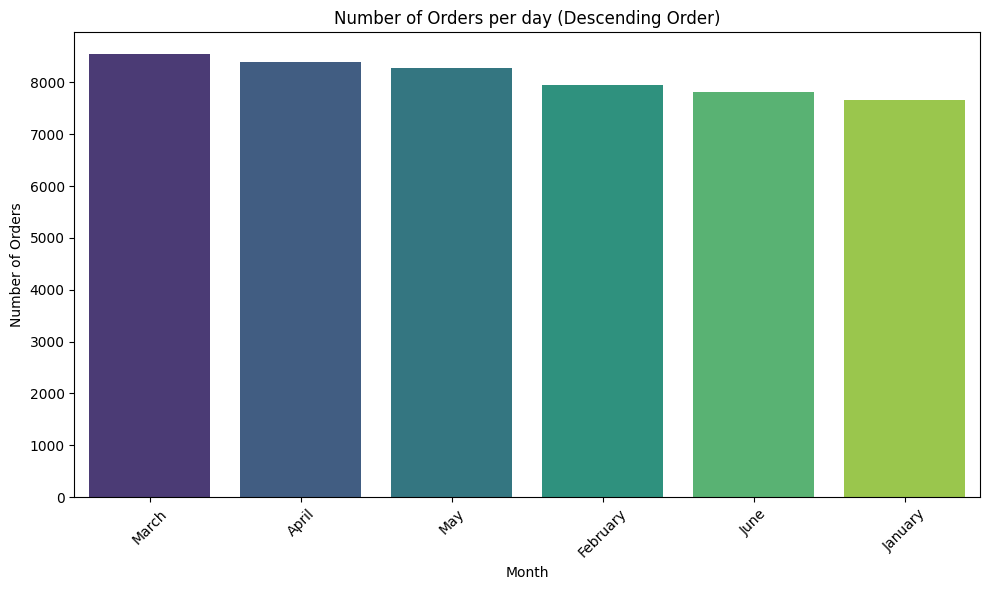

In [234]:
# Plotting the colored bar chart with the sorted order
plt.figure(figsize=(10, 6))
sns.barplot(x=orders_per_month_day.index, y=orders_per_month_day.values, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per day (Descending Order)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()       # the average odres per month

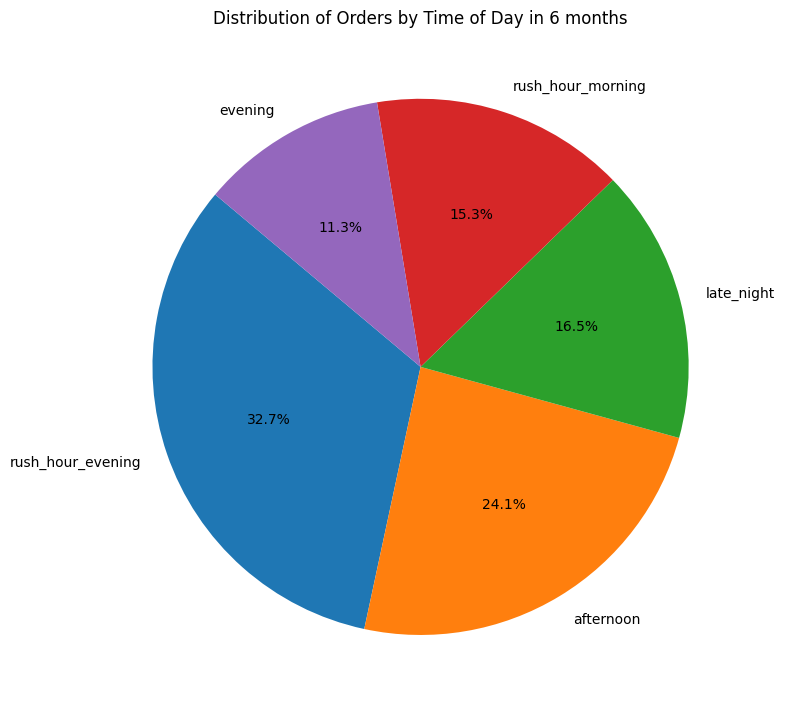

In [230]:

#  the counts for each category in 'time_of_day' for all records
time_of_day_counts = df_NYCTaxis['time_of_day'].value_counts()

# Plotting a pie chart for counts per 'time_of_day'
plt.figure(figsize=(8, 8))
plt.pie(time_of_day_counts, labels=time_of_day_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Orders by Time of Day in 6 months')
plt.tight_layout()
plt.show()


# The most frequent day of the week among the six months is: Friday

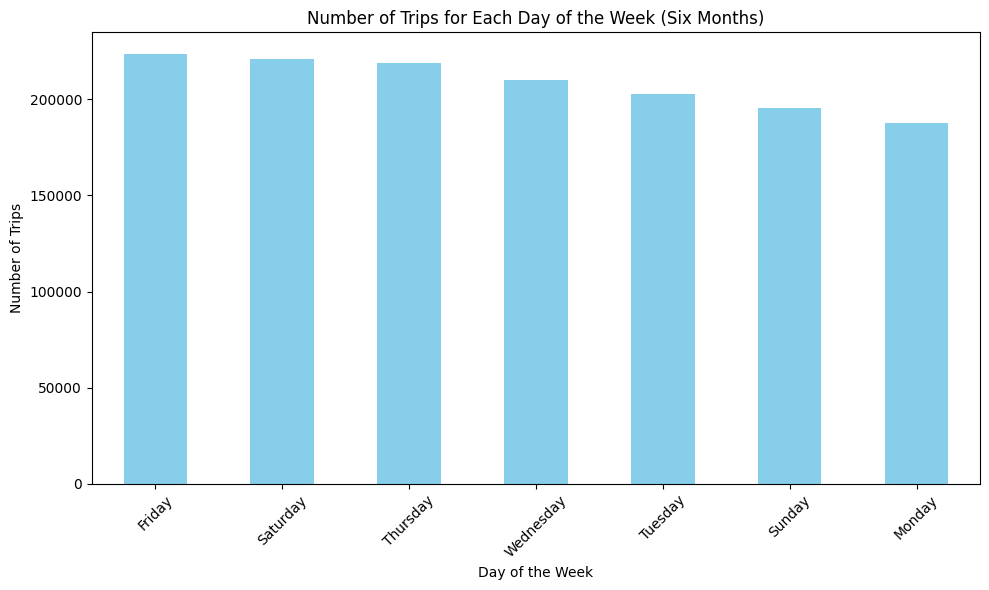

The most frequent day of the week among the six months is: Friday


In [267]:
def get_day(date1):
    # Assuming 'date1' is a DataFrame column containing datetime values
    date1 = pd.to_datetime(date1)
    x = date1.dt.day_name()
    return x
df_NYCTaxis['Day_of_Week'] = get_day(df_NYCTaxis['pickup_datetime'])


# Convert it to a datetime if it's not already in that format
df_NYCTaxis['pickup_datetime'] = pd.to_datetime(df_NYCTaxis['pickup_datetime'])

# Extract the day of the week from the pickup date
df_NYCTaxis['weekday'] = df_NYCTaxis['pickup_datetime'].dt.day_name()

# Select the data for the six months
six_months_data = df_NYCTaxis[df_NYCTaxis['pickup_datetime'].dt.month.isin([1, 2, 3, 4, 5, 6])] 

# Calculate the count of trips for each day of the week
day_of_week_counts = six_months_data['weekday'].value_counts()

#  the bar chart for the number of trips per day of the week
plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Number of Trips for Each Day of the Week (Six Months)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  the most frequent day of the week among these six months
most_frequent_day = day_of_week_counts.idxmax()
print(f"The most frequent day of the week among the six months is: {most_frequent_day}")


# #Trip Duration Variation Throughout the Day
# 🚀 The most frequent day of the week among the six months is: Friday
# 🚀 The maximum duration for a trip is up to 16 minutes on average, which might vary more or less during rush hours.




<Figure size 1000x600 with 0 Axes>

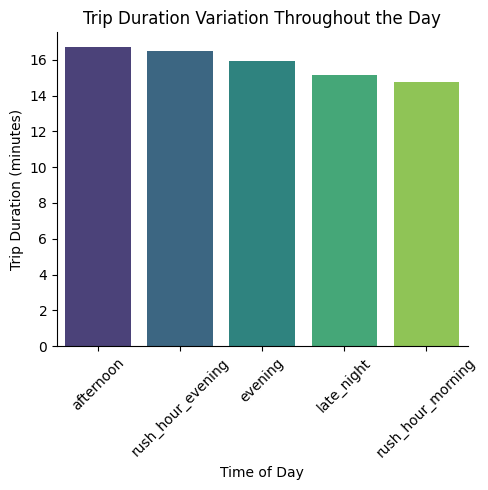

In [219]:

avg_duration_per_time = df_NYCTaxis.groupby('time_of_day')['duration_minutes'].mean().reset_index()

# Sort the data by duration in descending order
sorted_data = avg_duration_per_time.sort_values('duration_minutes', ascending=False)
# Create a bar plot to visualize trip duration variation throughout the day
plt.figure(figsize=(10, 6))
g = sns.catplot(x='time_of_day', y='duration_minutes', data=sorted_data, kind='bar', hue='time_of_day',
                palette='viridis', legend=False)
g.set_axis_labels("Time of Day", "Trip Duration (minutes)")
g.set_xticklabels(rotation=45)
plt.title("Trip Duration Variation Throughout the Day")
plt.tight_layout()

# Show the plot
plt.show()  #### traffic duration

1. Scatter Plot:
A scatter plot can help visualize the relationship between 'distance_miles' and another numerical variable, such as 'trip_duration' or 'passenger_count'.




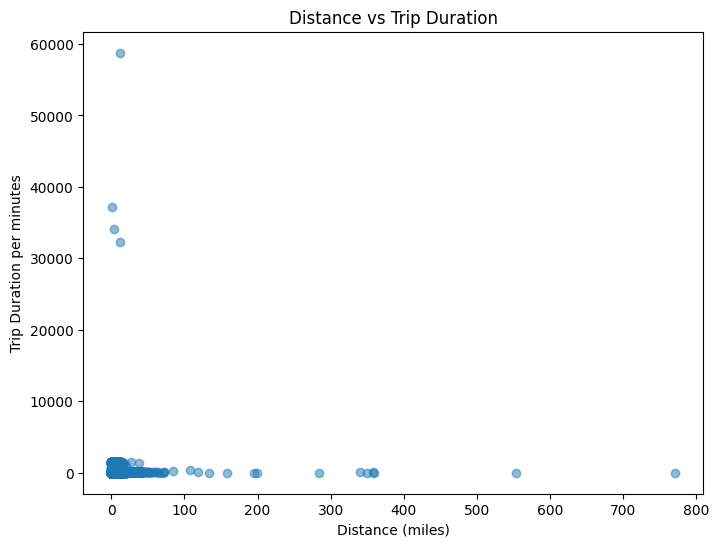

In [179]:
plt.figure(figsize=(8, 6))
plt.scatter(df_NYCTaxis['distance_miles'], df_NYCTaxis['duration_minutes'], alpha=0.5)
plt.xlabel('Distance (miles)')
plt.ylabel('Trip Duration per minutes')
plt.title('Distance vs Trip Duration')
plt.show()


# 🚀 The longest distances traveled along with their respective duration per mile are:
770.817337 miles with an average of 13.200000 minutes per mile
554.054184 miles with an average of 10.183333 minutes per mile
359.512786 miles with an average of 5.050000 minutes per mile
# 🚀 These durations seem unusual and suggest a technical issue either with the car or the system. These records need a review.


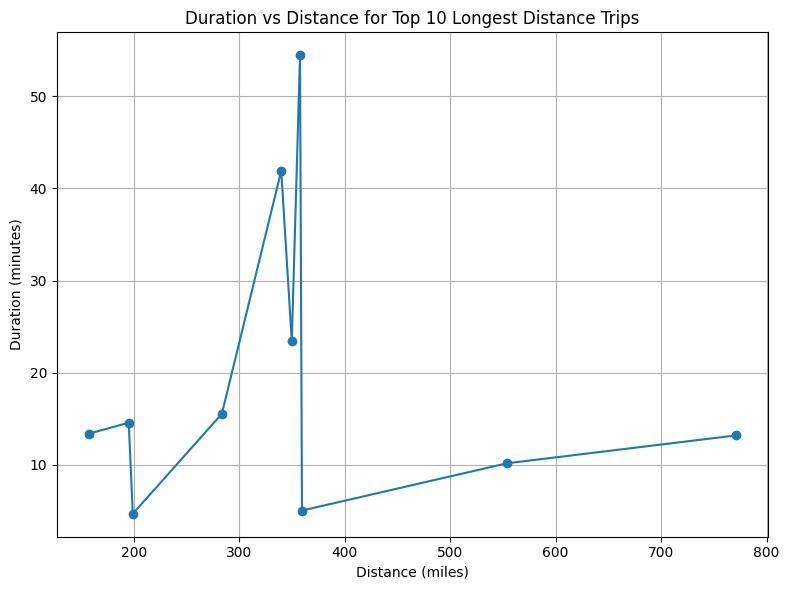

In [252]:
# Select the top 3 rows with the largest distances
top_10_distances = df_NYCTaxis.nlargest(10, 'distance_miles')[['distance_miles', 'duration_minutes']]

# Plotting relationship between distance and duration for the top 3 distances
plt.figure(figsize=(8, 6))
plt.plot(top_10_distances['distance_miles'], top_10_distances['duration_minutes'], marker='o', linestyle='-')
plt.xlabel('Distance (miles)')
plt.ylabel('Duration (minutes)')
plt.title('Duration vs Distance for Top 10 Longest Distance Trips')
plt.grid(True)
plt.tight_layout()
plt.show()


In [185]:
df_NYCTaxis[df_NYCTaxis['duration_minutes'].eq(58771.36666666667)]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_of_day,duration_minutes,hour_of_day,distance_miles
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282,evening,58771.366667,22,12.38182


In [259]:
df_NYCTaxis.nlargest(3, 'distance_miles')[['distance_miles','duration_minutes']]


,distance_miles,duration_minutes
184925,770.817337,13.200000
974378,554.054184,10.183333
910072,359.512786,5.050000


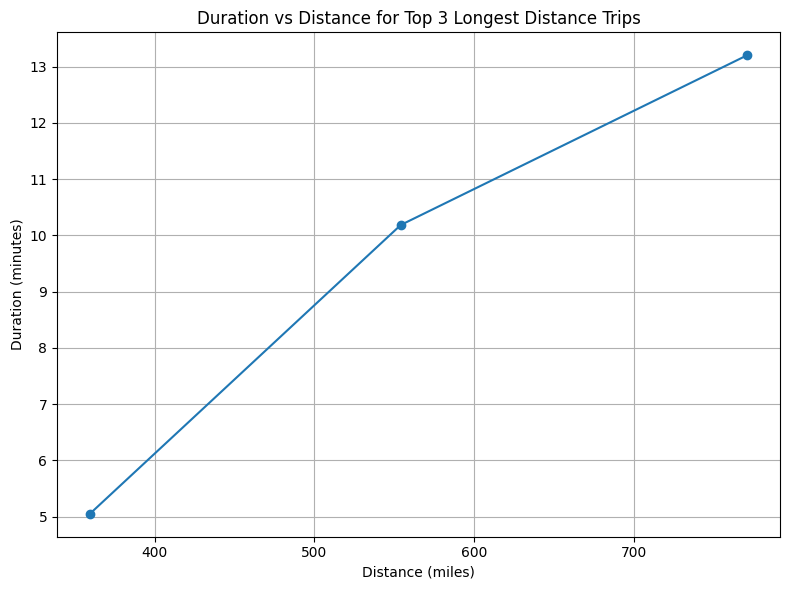

In [249]:
# Select the top 3 rows with the largest distances
top_3_distances = df_NYCTaxis.nlargest(3, 'distance_miles')[['distance_miles', 'duration_minutes']]

# Plotting relationship between distance and duration for the top 3 distances
plt.figure(figsize=(8, 6))
plt.plot(top_3_distances['distance_miles'], top_3_distances['duration_minutes'], marker='o', linestyle='-')
plt.xlabel('Distance (miles)')
plt.ylabel('Duration (minutes)')
plt.title('Duration vs Distance for Top 3 Longest Distance Trips')
plt.grid(True)
plt.tight_layout()
plt.show()


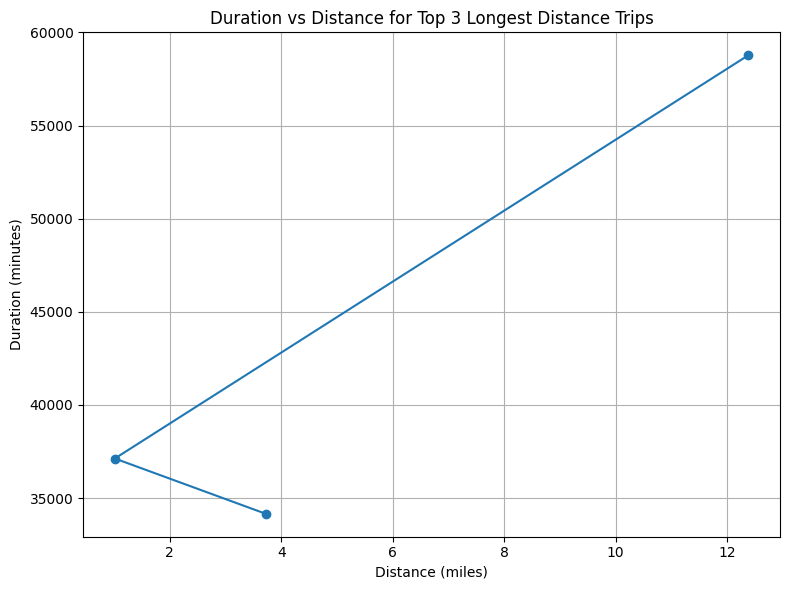

In [254]:
# Select the top 3 rows with the largest distances
top_3_longes_trips = df_NYCTaxis.nlargest(3, 'duration_minutes')[['distance_miles', 'duration_minutes']]

# Plotting relationship between distance and duration for the top 3 distances
plt.figure(figsize=(8, 6))
plt.plot(top_3_longes_trips['distance_miles'], top_3_longes_trips['duration_minutes'], marker='o', linestyle='-')
plt.xlabel('Distance (miles)')
plt.ylabel('Duration (minutes)')
plt.title('Duration vs Distance for Top 3 Longest Distance Trips')
plt.grid(True)
plt.tight_layout()
plt.show()


In [257]:
top_3_longes_trips.duration_minutes/60/24

978383    40.813449
924150    25.782546
680594    23.721968
Name: duration_minutes, dtype: float64

In [260]:
top_3_longes_trips

,distance_miles,duration_minutes
978383,12.381820,58771.366667
924150,1.014716,37126.866667
680594,3.723799,34159.633333


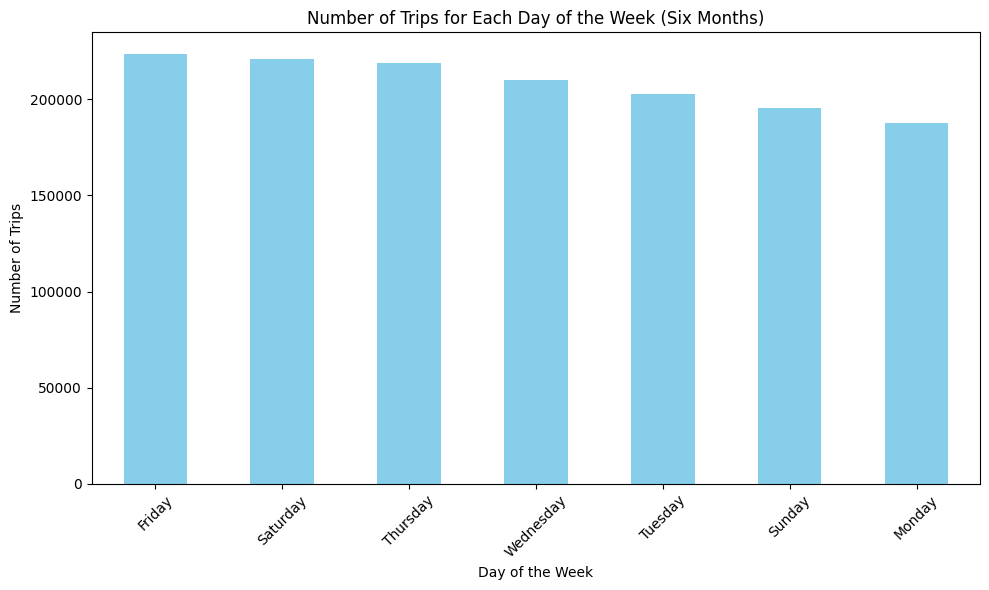

The most frequent day of the week among the six months is: Friday
